In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook.
%matplotlib inline


In [2]:
df = pd.read_csv('interactions_summary_20180112.csv', na_values='0.0')

In [3]:
df = df[:17772]
df.tail()

,CX Calls Call Started Date,CX Calls Call Started Hour of Day,calls,emails,chats,sms,orders
17767,1/10/2018,20.0,669.0,709.0,209.0,13.0,1365.0
17768,1/10/2018,21.0,189.0,553.0,49.0,17.0,1061.0
17769,1/10/2018,22.0,81.0,397.0,NaN,1.0,721.0
17770,1/10/2018,23.0,17.0,301.0,NaN,9.0,377.0
17771,1/11/2018,2.0,NaN,69.0,NaN,NaN,NaN


In [4]:
df.columns

Index([u'CX Calls Call Started Date', u'CX Calls Call Started Hour of Day',
       u'calls', u'emails', u'chats', u'sms', u'orders'],
      dtype='object')

In [5]:
newcols={'CX Calls Call Started Date':'date','CX Calls Call Started Hour of Day':'hour_of_day','calls':'calls','emails':'emails','chats':'chats','sms':'sms','orders':'orders'}
df = df.rename(columns = newcols)

In [6]:
columns_to_add = ['year', 'weekday', 'weekend', 'day_of_week']

In [7]:
df.head()

,date,hour_of_day,calls,emails,chats,sms,orders
0,1/1/2016,16.0,NaN,877.0,NaN,NaN,725.0
1,1/1/2016,8.0,NaN,361.0,NaN,NaN,81.0
2,1/1/2016,7.0,NaN,65.0,NaN,NaN,9.0
3,1/1/2016,19.0,NaN,501.0,NaN,NaN,357.0
4,1/1/2016,15.0,NaN,889.0,NaN,NaN,605.0


In [8]:
df['date2'] = pd.to_datetime(df['date'])
df.head()

,date,hour_of_day,calls,emails,chats,sms,orders,date2
0,1/1/2016,16.0,NaN,877.0,NaN,NaN,725.0,2016-01-01
1,1/1/2016,8.0,NaN,361.0,NaN,NaN,81.0,2016-01-01
2,1/1/2016,7.0,NaN,65.0,NaN,NaN,9.0,2016-01-01
3,1/1/2016,19.0,NaN,501.0,NaN,NaN,357.0,2016-01-01
4,1/1/2016,15.0,NaN,889.0,NaN,NaN,605.0,2016-01-01


In [9]:
df = df.drop(['date'],axis=1)

In [10]:
df = df.rename(columns = {'date2':'date'})
df.head()

,hour_of_day,calls,emails,chats,sms,orders,date
0,16.0,NaN,877.0,NaN,NaN,725.0,2016-01-01
1,8.0,NaN,361.0,NaN,NaN,81.0,2016-01-01
2,7.0,NaN,65.0,NaN,NaN,9.0,2016-01-01
3,19.0,NaN,501.0,NaN,NaN,357.0,2016-01-01
4,15.0,NaN,889.0,NaN,NaN,605.0,2016-01-01


In [11]:
df['year'] = [pd.to_numeric(str(i)[:4]) for i in df['date']]
df.head()

,hour_of_day,calls,emails,chats,sms,orders,date,year
0,16.0,NaN,877.0,NaN,NaN,725.0,2016-01-01,2016
1,8.0,NaN,361.0,NaN,NaN,81.0,2016-01-01,2016
2,7.0,NaN,65.0,NaN,NaN,9.0,2016-01-01,2016
3,19.0,NaN,501.0,NaN,NaN,357.0,2016-01-01,2016
4,15.0,NaN,889.0,NaN,NaN,605.0,2016-01-01,2016


In [12]:
df['month'] = [pd.to_numeric(str(i)[5:7]) for i in df['date']]
df.head()

,hour_of_day,calls,emails,chats,sms,orders,date,year,month
0,16.0,NaN,877.0,NaN,NaN,725.0,2016-01-01,2016,1
1,8.0,NaN,361.0,NaN,NaN,81.0,2016-01-01,2016,1
2,7.0,NaN,65.0,NaN,NaN,9.0,2016-01-01,2016,1
3,19.0,NaN,501.0,NaN,NaN,357.0,2016-01-01,2016,1
4,15.0,NaN,889.0,NaN,NaN,605.0,2016-01-01,2016,1


In [13]:
df['weekday'] = pd.to_datetime(df['date']).apply(lambda x: x.weekday())
df.head()

,hour_of_day,calls,emails,chats,sms,orders,date,year,month,weekday
0,16.0,NaN,877.0,NaN,NaN,725.0,2016-01-01,2016,1,4
1,8.0,NaN,361.0,NaN,NaN,81.0,2016-01-01,2016,1,4
2,7.0,NaN,65.0,NaN,NaN,9.0,2016-01-01,2016,1,4
3,19.0,NaN,501.0,NaN,NaN,357.0,2016-01-01,2016,1,4
4,15.0,NaN,889.0,NaN,NaN,605.0,2016-01-01,2016,1,4


In [14]:
df.weekday.describe()

count    17772.000000
mean         2.999944
std          2.001533
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: weekday, dtype: float64

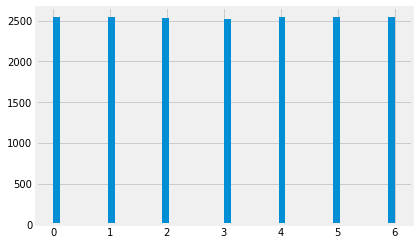

In [15]:
df.weekday.hist(bins=50)

In [16]:
df.describe(include='all')

,hour_of_day,calls,emails,chats,sms,orders,date,year,month,weekday
count,17032.000000,13830.000000,17686.000000,9180.000000,9756.000000,17738.000000,17772,17772.000000,17772.000000,17772.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,742,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-21 00:00:00,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-11 00:00:00,NaN,NaN,NaN
mean,12.004932,605.243818,1259.283614,196.240959,197.959820,745.663885,NaN,2016.519413,6.447727,2.999944
std,6.632646,769.827596,1617.056084,89.505036,376.455036,752.949248,NaN,0.525652,3.484497,2.001533
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,2016.000000,1.000000,0.000000
25%,6.000000,29.000000,245.000000,137.000000,5.000000,85.000000,NaN,2016.000000,3.000000,1.000000


In [17]:
df.corr()

,hour_of_day,calls,emails,chats,sms,orders,year,month,weekday
hour_of_day,1.000000,0.057303,0.295435,-0.337730,0.006355,0.494298,0.000006,-0.000695,0.000173
calls,0.057303,1.000000,0.540726,0.599607,0.351403,0.585057,0.126439,0.012632,-0.237941
emails,0.295435,0.540726,1.000000,0.469153,0.364123,0.552056,0.107005,-0.001234,-0.255920
chats,-0.337730,0.599607,0.469153,1.000000,0.332394,0.310795,0.169174,0.016456,-0.482450
sms,0.006355,0.351403,0.364123,0.332394,1.000000,0.552938,0.162527,0.066055,0.016226
orders,0.494298,0.585057,0.552056,0.310795,0.552938,1.000000,0.158721,0.046285,0.030464
year,0.000006,0.126439,0.107005,0.169174,0.162527,0.158721,1.000000,-0.057910,-0.011043
month,-0.000695,0.012632,-0.001234,0.016456,0.066055,0.046285,-0.057910,1.000000,0.011348
weekday,0.000173,-0.237941,-0.255920,-0.482450,0.016226,0.030464,-0.011043,0.011348,1.000000


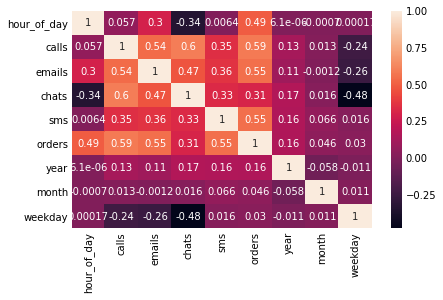

In [18]:
sns.heatmap(df.corr(),annot=True, yticklabels=True);

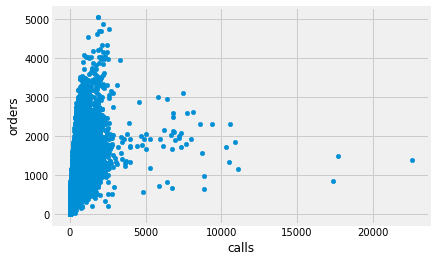

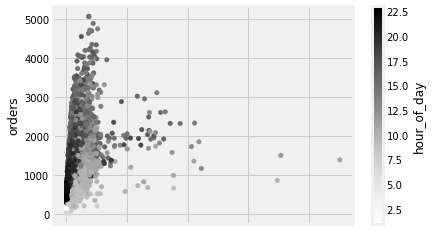

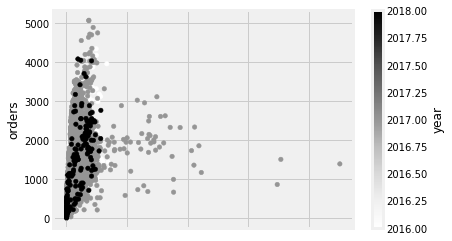

In [19]:
df.plot.scatter(x='calls', y='orders');
df.plot.scatter(x='calls', y='orders', c='hour_of_day');
df.plot.scatter(x='calls', y='orders', c='year');

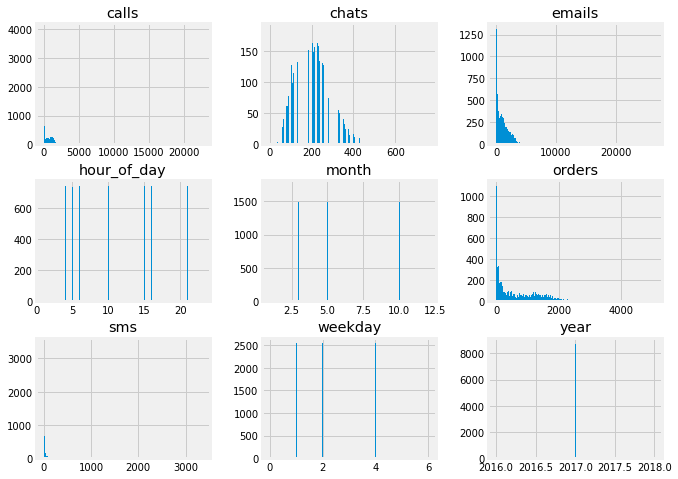

In [20]:
# Plot all variables using histograms:
df.hist(figsize=(10,8), bins = 500);

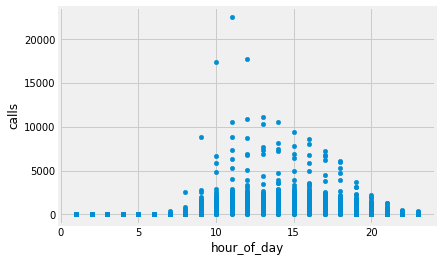

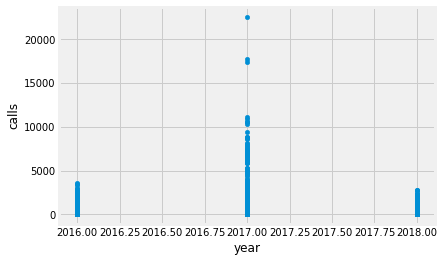

In [21]:
df.plot(kind='scatter', x='hour_of_day', y='calls');
df.plot(kind='scatter', x='year', y='calls');

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17772 entries, 0 to 17771
Data columns (total 10 columns):
hour_of_day    17032 non-null float64
calls          13830 non-null float64
emails         17686 non-null float64
chats          9180 non-null float64
sms            9756 non-null float64
orders         17738 non-null float64
date           17772 non-null datetime64[ns]
year           17772 non-null int64
month          17772 non-null int64
weekday        17772 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 1.4 MB


In [23]:
df.groupby('year').calls.mean()

year
2016    499.360883
2017    692.395553
2018    783.235294
Name: calls, dtype: float64

In [24]:
df.groupby('year').mean()

,hour_of_day,calls,emails,chats,sms,orders,month,weekday
year,,,,,,,,
2016,12.005944,499.360883,1084.250086,181.167600,112.595147,625.416124,6.515379,3.007519
2017,12.002860,692.395553,1423.810613,209.615385,234.752369,859.091252,6.527350,3.008336
2018,12.043860,783.235294,1618.113924,242.312500,361.213904,1004.508475,1.000000,2.409283


In [25]:
# frame["c"] = frame[["a", "b"]].sum(axis=1)
df['interactions'] = df[['calls','emails','chats','sms']].sum(axis=1)
df.tail(5)

,hour_of_day,calls,emails,chats,sms,orders,date,year,month,weekday,interactions
17767,20.0,669.0,709.0,209.0,13.0,1365.0,2018-01-10,2018,1,2,1600.0
17768,21.0,189.0,553.0,49.0,17.0,1061.0,2018-01-10,2018,1,2,808.0
17769,22.0,81.0,397.0,NaN,1.0,721.0,2018-01-10,2018,1,2,479.0
17770,23.0,17.0,301.0,NaN,9.0,377.0,2018-01-10,2018,1,2,327.0
17771,2.0,NaN,69.0,NaN,NaN,NaN,2018-01-11,2018,1,3,69.0


In [26]:
from datetime import datetime
# >>> int(format(datetime(2013,2,21), '%j'))
df['day_of_year'] = pd.to_datetime(df['date']).apply(lambda x: x.dayofyear)
df.tail(30)

,hour_of_day,calls,emails,chats,sms,orders,date,year,month,weekday,interactions,day_of_year
17742,8.0,129.0,1009.0,NaN,17.0,213.0,2018-01-09,2018,1,1,1155.0,9
17743,21.0,117.0,1553.0,41.0,25.0,1101.0,2018-01-09,2018,1,1,1736.0,9
17744,18.0,1293.0,2533.0,293.0,445.0,2081.0,2018-01-09,2018,1,1,4564.0,9
17745,19.0,957.0,2089.0,309.0,53.0,1869.0,2018-01-09,2018,1,1,3408.0,9
17746,9.0,753.0,1465.0,333.0,45.0,817.0,2018-01-09,2018,1,1,2596.0,9
17747,22.0,105.0,1121.0,NaN,5.0,685.0,2018-01-09,2018,1,1,1231.0,9
17748,10.0,1365.0,2045.0,353.0,37.0,893.0,2018-01-09,2018,1,1,3800.0,9
17749,2.0,NaN,189.0,NaN,1.0,53.0,2018-01-09,2018,1,1,190.0,9
17750,4.0,NaN,101.0,NaN,NaN,29.0,2018-01-09,2018,1,1,101.0,9
17751,4.0,NaN,97.0,NaN,NaN,25.0,2018-01-10,2018,1,2,97.0,10


In [27]:
# graph 1    x:'day_of_year', y='interactions', series= 'year'
# graph 2    x: 'day_of_year', y='orders', series = 'year'

In [28]:
# how to pull 1 week later interactions.  new_columns = ['date', 'interactions', 'orders']
# est_interactions_week = interactions at 'date'+7 days. 
# est_interactions_month = interactions at 'date' + 28 days


In [29]:
df2 = df.copy()
df2 = df2.drop(['hour_of_day'], axis=1)
df2.head()

,calls,emails,chats,sms,orders,date,year,month,weekday,interactions,day_of_year
0,NaN,877.0,NaN,NaN,725.0,2016-01-01,2016,1,4,877.0,1
1,NaN,361.0,NaN,NaN,81.0,2016-01-01,2016,1,4,361.0,1
2,NaN,65.0,NaN,NaN,9.0,2016-01-01,2016,1,4,65.0,1
3,NaN,501.0,NaN,NaN,357.0,2016-01-01,2016,1,4,501.0,1
4,NaN,889.0,NaN,NaN,605.0,2016-01-01,2016,1,4,889.0,1


In [30]:
df2.set_index('date', inplace=True)
df2.head()

,calls,emails,chats,sms,orders,year,month,weekday,interactions,day_of_year
date,,,,,,,,,,
2016-01-01,NaN,877.0,NaN,NaN,725.0,2016,1,4,877.0,1
2016-01-01,NaN,361.0,NaN,NaN,81.0,2016,1,4,361.0,1
2016-01-01,NaN,65.0,NaN,NaN,9.0,2016,1,4,65.0,1
2016-01-01,NaN,501.0,NaN,NaN,357.0,2016,1,4,501.0,1
2016-01-01,NaN,889.0,NaN,NaN,605.0,2016,1,4,889.0,1


In [31]:
df2 = df2.groupby(by='date').sum()
df2.head()

,calls,emails,chats,sms,orders,year,month,weekday,interactions,day_of_year
date,,,,,,,,,,
2016-01-01,0.0,11152.0,14.0,0.0,6456.0,48384,24,96,11166.0,24
2016-01-02,0.0,16000.0,961.0,0.0,16592.0,48384,24,120,16961.0,48
2016-01-03,0.0,17544.0,764.0,0.0,12735.0,48384,24,144,18308.0,72
2016-01-04,0.0,50848.0,2757.0,0.0,14444.0,48384,24,0,53605.0,96
2016-01-05,0.0,38604.0,2584.0,0.0,14183.0,48384,24,24,41188.0,120


In [32]:
df2 = df2.drop(['year', 'month', 'weekday', 'day_of_year'], axis=1)
df2.head()

,calls,emails,chats,sms,orders,interactions
date,,,,,,
2016-01-01,0.0,11152.0,14.0,0.0,6456.0,11166.0
2016-01-02,0.0,16000.0,961.0,0.0,16592.0,16961.0
2016-01-03,0.0,17544.0,764.0,0.0,12735.0,18308.0
2016-01-04,0.0,50848.0,2757.0,0.0,14444.0,53605.0
2016-01-05,0.0,38604.0,2584.0,0.0,14183.0,41188.0


In [33]:
df2['year'] = df2.index.year
df2['month'] = df2.index.month
df2['day_of_year'] = df2.index.dayofyear
df2['weekday'] = df2.index.weekday
df2['week'] = df2.index.week
df2.tail(20)

,calls,emails,chats,sms,orders,interactions,year,month,day_of_year,weekday,week
date,,,,,,,,,,,
2017-12-23,10605.0,21616.0,1724.0,4262.0,27064.0,38207.0,2017,12,357,5,51
2017-12-24,5364.0,11596.0,607.0,249.0,13132.0,17816.0,2017,12,358,6,51
2017-12-25,783.0,14328.0,0.0,776.0,4316.0,15887.0,2017,12,359,0,52
2017-12-26,18572.0,41092.0,2710.0,4329.0,30776.0,66703.0,2017,12,360,1,52
2017-12-27,21059.0,54500.0,4117.0,8823.0,36016.0,88499.0,2017,12,361,2,52
2017-12-28,20560.0,54056.0,3586.0,9295.0,38052.0,87497.0,2017,12,362,3,52
2017-12-29,23062.0,54492.0,3209.0,8450.0,41648.0,89213.0,2017,12,363,4,52
2017-12-30,17461.0,38320.0,2762.0,6943.0,42584.0,65486.0,2017,12,364,5,52
2017-12-31,14166.0,28452.0,2201.0,378.0,32424.0,45197.0,2017,12,365,6,52


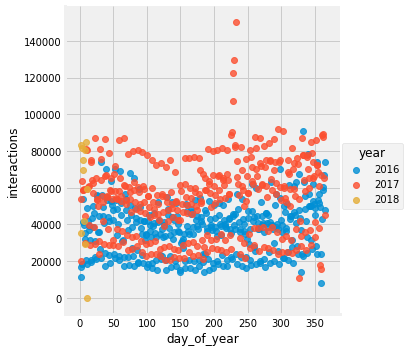

In [34]:
sns.lmplot(x='day_of_year', y='interactions', data=df2,
          fit_reg=False, hue='year');

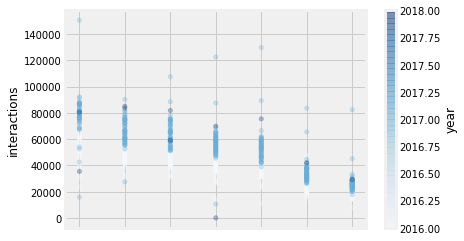

In [35]:
df2.plot(kind='scatter', x='weekday', y='interactions', c='year', alpha=0.3,  colormap='Blues');

In [36]:
df3 = df.copy()
df3 = df3.drop(['hour_of_day'], axis=1).groupby(by='date').sum()
df3['week'] = df3.index.week
df3.reset_index(level=0, inplace=True)
# df3 = df3.set_index('week')
df3['day_of_year'] = pd.to_datetime(df3['date']).apply(lambda x: x.dayofyear)
df3['year'] = pd.to_datetime(df3['date']).apply(lambda x: x.year)
df3['month'] = pd.to_datetime(df3['date']).apply(lambda x: x.month)
df3['weekday'] = pd.to_datetime(df3['date']).apply(lambda x: x.dayofweek)
df3.head()

,date,calls,emails,chats,sms,orders,year,month,weekday,interactions,day_of_year,week
0,2016-01-01,0.0,11152.0,14.0,0.0,6456.0,2016,1,4,11166.0,1,53
1,2016-01-02,0.0,16000.0,961.0,0.0,16592.0,2016,1,5,16961.0,2,53
2,2016-01-03,0.0,17544.0,764.0,0.0,12735.0,2016,1,6,18308.0,3,53
3,2016-01-04,0.0,50848.0,2757.0,0.0,14444.0,2016,1,0,53605.0,4,1
4,2016-01-05,0.0,38604.0,2584.0,0.0,14183.0,2016,1,1,41188.0,5,1


In [37]:
#removing outliers caused by the eclipse
df3 = df3.drop([593,594,595,598])
df3[(df3['month']==8) & (df3['year']==2017)]

,date,calls,emails,chats,sms,orders,year,month,weekday,interactions,day_of_year,week
578,2017-08-01,15188.0,43468.0,3141.0,3648.0,20280.0,2017,8,1,65445.0,213,31
579,2017-08-02,13740.0,43316.0,2847.0,4530.0,18952.0,2017,8,2,64433.0,214,31
580,2017-08-03,14669.0,37808.0,2849.0,5910.0,19244.0,2017,8,3,61236.0,215,31
581,2017-08-04,14796.0,32528.0,2428.0,4619.0,20220.0,2017,8,4,54371.0,216,31
582,2017-08-05,8350.0,16748.0,1773.0,4347.0,24028.0,2017,8,5,31218.0,217,31
583,2017-08-06,4899.0,13212.0,1356.0,5360.0,19568.0,2017,8,6,24827.0,218,31
584,2017-08-07,17177.0,54216.0,3033.0,6298.0,19336.0,2017,8,0,80724.0,219,32
585,2017-08-08,15977.0,44644.0,3384.0,3287.0,20992.0,2017,8,1,67292.0,220,32
586,2017-08-09,15237.0,41068.0,3050.0,4993.0,19972.0,2017,8,2,64348.0,221,32
587,2017-08-10,14947.0,35848.0,2712.0,3238.0,19200.0,2017,8,3,56745.0,222,32


In [38]:
dfyearday = df3.drop(['date','month','weekday','week'],axis=1).groupby(by=['year','day_of_year']).sum()
dfyearday.head()

calls   emails   chats  sms   orders  interactions
year day_of_year                                                    
2016 1              0.0  11152.0    14.0  0.0   6456.0       11166.0
     2              0.0  16000.0   961.0  0.0  16592.0       16961.0
     3              0.0  17544.0   764.0  0.0  12735.0       18308.0
     4              0.0  50848.0  2757.0  0.0  14444.0       53605.0
     5              0.0  38604.0  2584.0  0.0  14183.0       41188.0

In [39]:
dfyearday.reset_index(level=0, inplace=True)
dfyearday.reset_index(level=0, inplace=True)
dfyearday.head()

,day_of_year,year,calls,emails,chats,sms,orders,interactions
0,1,2016,0.0,11152.0,14.0,0.0,6456.0,11166.0
1,2,2016,0.0,16000.0,961.0,0.0,16592.0,16961.0
2,3,2016,0.0,17544.0,764.0,0.0,12735.0,18308.0
3,4,2016,0.0,50848.0,2757.0,0.0,14444.0,53605.0
4,5,2016,0.0,38604.0,2584.0,0.0,14183.0,41188.0


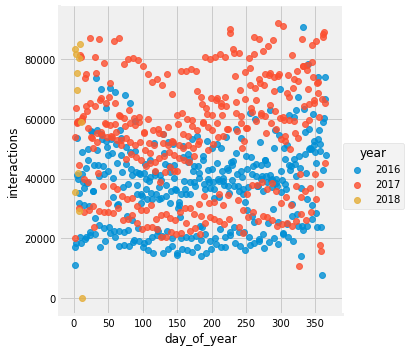

In [40]:
sns.lmplot(x='day_of_year', y='interactions', data=dfyearday,
          fit_reg=False, hue='year');

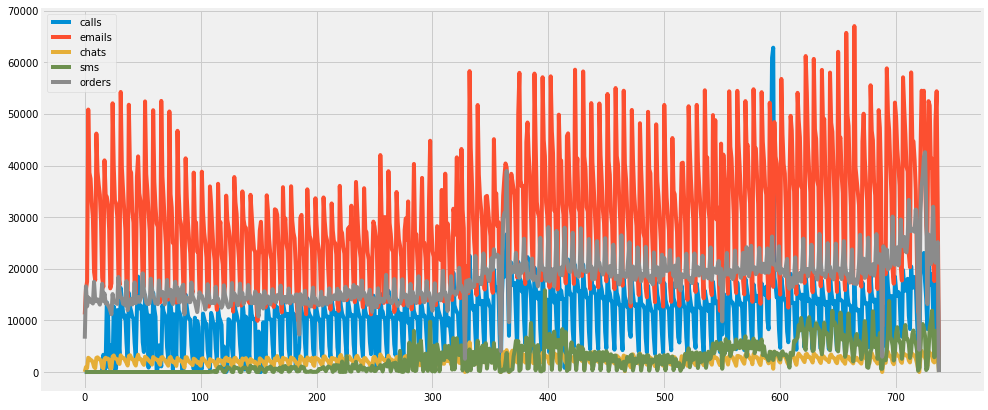

In [41]:
dfyearday[['calls', 'emails','chats','sms','orders']].plot(figsize=(15,7));

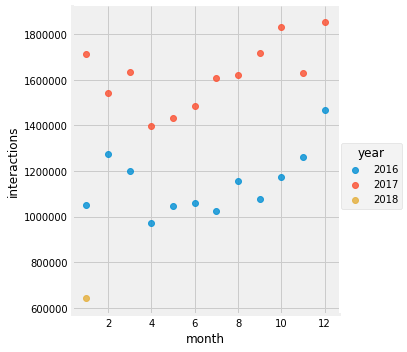

In [42]:
dfyearmonth = df3.drop(['date','day_of_year','weekday','week'],axis=1).groupby(by=['year','month']).sum()

dfyearmonth.reset_index(level=0, inplace=True)
dfyearmonth.reset_index(level=0, inplace=True)

sns.lmplot(x='month', y='interactions', data=dfyearmonth,
          fit_reg=False, hue='year');

In [43]:
dfyearweek = df3.drop(['date','month','weekday','day_of_year'],axis=1).groupby(by=['year','week']).sum()
dfyearweek.head()

calls    emails    chats  sms    orders  interactions
year week                                                         
2016 1         0.0  226788.0  13474.0  0.0  100215.0      240262.0
     2      3705.0  219524.0  14359.0  0.0   99338.0      237588.0
     3     35242.0  202812.0  14232.0  0.0   90457.0      252286.0
     4     35589.0  223544.0  17148.0  0.0  102816.0      276281.0
     5     71026.0  218936.0  16596.0  0.0   97688.0      306558.0

In [44]:
dfyearweek.reset_index(level=0, inplace=True)
dfyearweek.reset_index(level=0, inplace=True)
dfyearweek.head()

,week,year,calls,emails,chats,sms,orders,interactions
0,1,2016,0.0,226788.0,13474.0,0.0,100215.0,240262.0
1,2,2016,3705.0,219524.0,14359.0,0.0,99338.0,237588.0
2,3,2016,35242.0,202812.0,14232.0,0.0,90457.0,252286.0
3,4,2016,35589.0,223544.0,17148.0,0.0,102816.0,276281.0
4,5,2016,71026.0,218936.0,16596.0,0.0,97688.0,306558.0


In [45]:
dfyearweek.tail()

,week,year,calls,emails,chats,sms,orders,interactions
102,50,2017,105533.0,276124.0,20929.0,42088.0,185100.0,444674.0
103,51,2017,105065.0,257024.0,18599.0,35586.0,181468.0,416274.0
104,52,2017,122680.0,298180.0,18585.0,39050.0,235464.0,478495.0
105,1,2018,103025.0,249672.0,19432.0,45055.0,166412.0,417184.0
106,2,2018,56755.0,133821.0,11584.0,22492.0,70652.0,224652.0


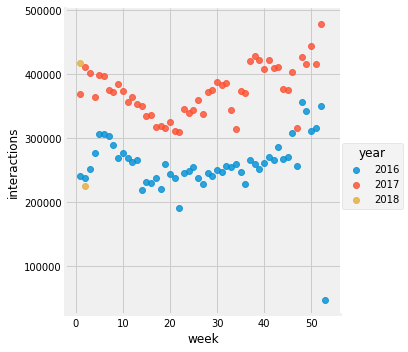

In [46]:
sns.lmplot(x='week', y='interactions', data=dfyearweek,
          fit_reg=False, hue='year');

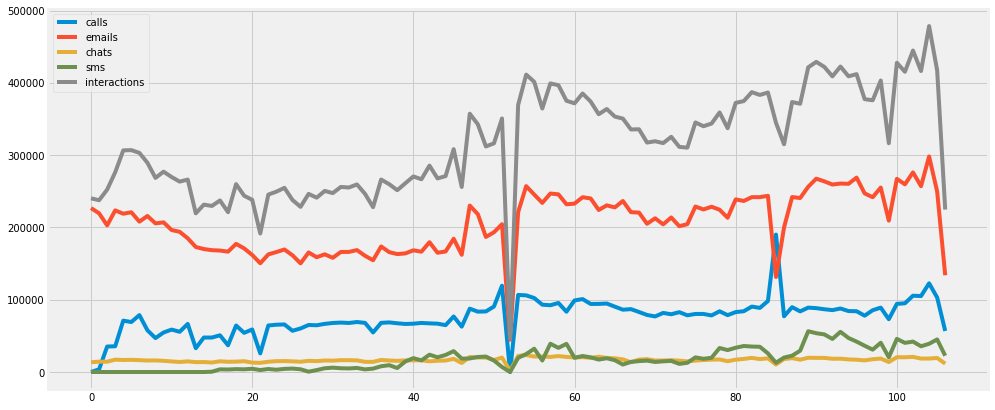

In [47]:
dfyearweek[['calls', 'emails','chats','sms', 'interactions']].plot(figsize=(15,7));

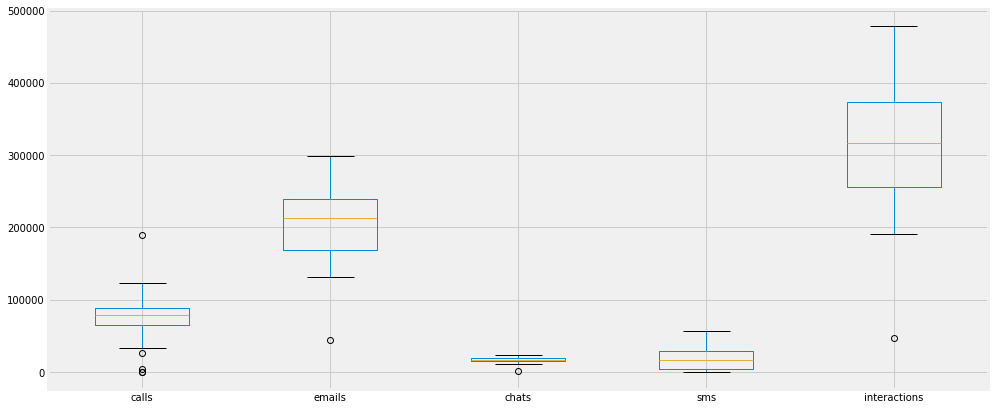

In [48]:
dfyearweek[['calls', 'emails','chats','sms','interactions']].boxplot(figsize=(15,7));

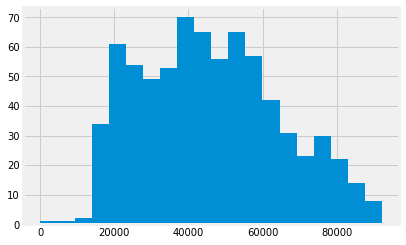

In [49]:
dfyearday.interactions.hist(bins=20);

In [50]:
#THIS SECTION NOW DATA MODELING

In [51]:
from sklearn.linear_model import LinearRegression

# Create a list of features.
feature_cols = ['day_of_year', 'year', 'orders']
# Create X and y.
X = dfyearday[feature_cols]
y = dfyearday.interactions

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

-26301933.3318
[  1.66910807e+01   1.30602268e+04   4.83684251e-01]


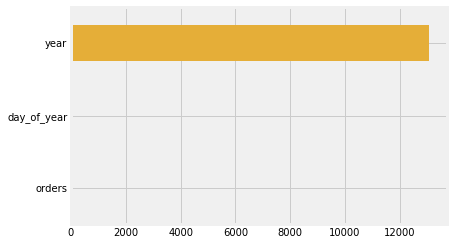

In [52]:
# Pair the feature names with the coefficients.
pd.Series(dict(zip(feature_cols, linreg.coef_))).sort_values().plot.barh();

             day_of_year      year    orders
day_of_year     1.000000 -0.073435  0.200480
year           -0.073435  1.000000  0.609088
orders          0.200480  0.609088  1.000000
AxesSubplot(0.08,0.125;0.696x0.755)


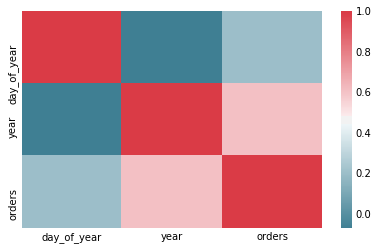

In [53]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = dfyearday[feature_cols].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

In [54]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, feature_cols):
    X = dfyearday[feature_cols]
    y = dfyearday.interactions
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [55]:
# Compare different sets of features.
print(train_test_rmse(dfyearday, ['day_of_year', 'year', 'orders']))
print(train_test_rmse(dfyearday, ['year', 'orders']))
print(train_test_rmse(dfyearday, ['year', 'day_of_year']))
print(train_test_rmse(dfyearday, ['orders', 'day_of_year']))

17353.8808989
17332.6607881
17535.324769
18174.2241316


In [56]:
#THERE IS A LOT OF VARIABILITY IN THE DATA, LINEAR MODEL ISN'T VERY GREAT. LET'S TRY IT WITH WEEKLY

In [57]:
dfyearweek.tail()

,week,year,calls,emails,chats,sms,orders,interactions
102,50,2017,105533.0,276124.0,20929.0,42088.0,185100.0,444674.0
103,51,2017,105065.0,257024.0,18599.0,35586.0,181468.0,416274.0
104,52,2017,122680.0,298180.0,18585.0,39050.0,235464.0,478495.0
105,1,2018,103025.0,249672.0,19432.0,45055.0,166412.0,417184.0
106,2,2018,56755.0,133821.0,11584.0,22492.0,70652.0,224652.0


In [58]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, feature_cols):
    X = dfyearweek[feature_cols]
    y = dfyearweek.interactions
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [59]:
# Compare different sets of features.
print(train_test_rmse(dfyearday, ['week', 'year', 'orders']))
print(train_test_rmse(dfyearday, ['year', 'orders']))
print(train_test_rmse(dfyearday, ['year', 'week']))
print(train_test_rmse(dfyearday, ['orders', 'week']))

33226.4481262
33146.6837005
32851.6915699
38024.1267238


In [60]:
#snap, i think im getting a midpoint between 2016 and 2017.  I'm going to try only using 2017.

In [61]:
dfyearday2017 = dfyearday[dfyearday['year']==2017]
dfyearday2017.head()

,day_of_year,year,calls,emails,chats,sms,orders,interactions
366,1,2017,7017.0,12940.0,0.0,56.0,9648.0,20013.0
367,2,2017,18952.0,32624.0,2349.0,163.0,21376.0,54088.0
368,3,2017,21160.0,38400.0,3772.0,414.0,19216.0,63746.0
369,4,2017,16912.0,36948.0,4144.0,509.0,20332.0,58513.0
370,5,2017,16779.0,35408.0,3780.0,3035.0,19588.0,59002.0


In [62]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, feature_cols):
    X = dfyearday2017[feature_cols]
    y = dfyearday2017.interactions
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Compare different sets of features.
print(train_test_rmse(dfyearday2017, ['day_of_year', 'year', 'orders']))
print(train_test_rmse(dfyearday2017, ['year', 'orders']))
print(train_test_rmse(dfyearday2017, ['year', 'day_of_year']))
print(train_test_rmse(dfyearday2017, ['orders', 'day_of_year']))

17211.4337474
17343.1481098
17201.5896889
17211.4337474


In [63]:
dfyearweek2017 = dfyearweek[dfyearweek['year'] == 2017]
dfyearweek2017.head()

,week,year,calls,emails,chats,sms,orders,interactions
53,1,2017,106608.0,220988.0,22191.0,19525.0,142092.0,369312.0
54,2,2017,106002.0,257107.0,23450.0,24823.0,143103.0,411382.0
55,3,2017,102303.0,245420.0,21390.0,32208.0,134888.0,401321.0
56,4,2017,93097.0,233936.0,21448.0,15964.0,138428.0,364445.0
57,5,2017,92333.0,246872.0,20868.0,39101.0,141744.0,399174.0


In [64]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, feature_cols):
    X = dfyearweek2017[feature_cols]
    y = dfyearweek2017.interactions
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Compare different sets of features.
print(train_test_rmse(dfyearweek2017, ['week', 'year', 'orders']))
print(train_test_rmse(dfyearweek2017, ['year', 'orders']))
print(train_test_rmse(dfyearweek2017, ['year', 'week']))
print(train_test_rmse(dfyearweek2017, ['orders', 'week']))

26175.3479692
28215.0144124
29832.7685826
26175.3479692


In [65]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

X = dfyearday[feature_cols]    
y = dfyearday.interactions

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=8)


lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.18421993313396035

In [66]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# iterate through folds 5-10
for folds in range(5,11):
    print('------------------------------------\n')
    print('K: {}'.format(folds))
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=folds)
    print("Cross-validated scores: {}".format(scores))
    print("Mean CV R2: {}".format(np.mean(scores)))
    print('Std CV R2: {}'.format(np.std(scores)))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X, y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print("Cross-Predicted R2: {}".format(r2))

------------------------------------

K: 5
Cross-validated scores: [-0.11391802 -0.162898    0.0481681  -0.11835342 -0.05317931]
Mean CV R2: -0.0800361292589
Std CV R2: 0.0729930134091
Cross-Predicted R2: 0.163440004147
------------------------------------

K: 6
Cross-validated scores: [-0.11385974 -0.10550013  0.04963055 -0.13579038 -0.01256583 -0.02573559]
Mean CV R2: -0.0573035188243
Std CV R2: 0.0659729694807
Cross-Predicted R2: 0.175142431121
------------------------------------

K: 7
Cross-validated scores: [-0.15750399 -0.15060828 -0.10036103 -0.01789023 -0.16197856 -0.02405706
 -0.00392989]
Mean CV R2: -0.0880470045569
Std CV R2: 0.0659524423631
Cross-Predicted R2: 0.170311351365
------------------------------------

K: 8
Cross-validated scores: [-0.17930273 -0.17050385 -0.10381384  0.00951778 -0.19222696 -0.19744371
 -0.09241996 -0.01271974]
Mean CV R2: -0.117364126703
Std CV R2: 0.0762665483642
Cross-Predicted R2: 0.152215073902
------------------------------------

K: 9
Cros

In [67]:
#let's try something else.
df3.head()

,date,calls,emails,chats,sms,orders,year,month,weekday,interactions,day_of_year,week
0,2016-01-01,0.0,11152.0,14.0,0.0,6456.0,2016,1,4,11166.0,1,53
1,2016-01-02,0.0,16000.0,961.0,0.0,16592.0,2016,1,5,16961.0,2,53
2,2016-01-03,0.0,17544.0,764.0,0.0,12735.0,2016,1,6,18308.0,3,53
3,2016-01-04,0.0,50848.0,2757.0,0.0,14444.0,2016,1,0,53605.0,4,1
4,2016-01-05,0.0,38604.0,2584.0,0.0,14183.0,2016,1,1,41188.0,5,1


In [68]:
weekday_dummies = pd.get_dummies(df3.weekday, prefix='weekday')
weekday_dummies.drop(weekday_dummies.columns[0], axis=1, inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
df3weekdumb = pd.concat([df3, weekday_dummies], axis=1)

# Print 5 random rows.
df3weekdumb.head()

,date,calls,emails,chats,sms,orders,year,month,weekday,interactions,day_of_year,week,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2016-01-01,0.0,11152.0,14.0,0.0,6456.0,2016,1,4,11166.0,1,53,0,0,0,1,0,0
1,2016-01-02,0.0,16000.0,961.0,0.0,16592.0,2016,1,5,16961.0,2,53,0,0,0,0,1,0
2,2016-01-03,0.0,17544.0,764.0,0.0,12735.0,2016,1,6,18308.0,3,53,0,0,0,0,0,1
3,2016-01-04,0.0,50848.0,2757.0,0.0,14444.0,2016,1,0,53605.0,4,1,0,0,0,0,0,0
4,2016-01-05,0.0,38604.0,2584.0,0.0,14183.0,2016,1,1,41188.0,5,1,1,0,0,0,0,0


In [69]:
#KNN on df3
# Create feature matrix (X).
feature_cols = ['month', 'orders', 'year', 'day_of_year', 'week', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']
X = df3weekdumb[feature_cols]

# Create response vector (y).
y = df3weekdumb.interactions

In [70]:
#Using the Train/Test Split Procedure (K=1)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [72]:
# Instantiate the model (using the value K=5).
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model with data.
knn.fit(X, y)

# Store the predicted response values.
y_pred_class = knn.predict(X)

In [73]:

scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

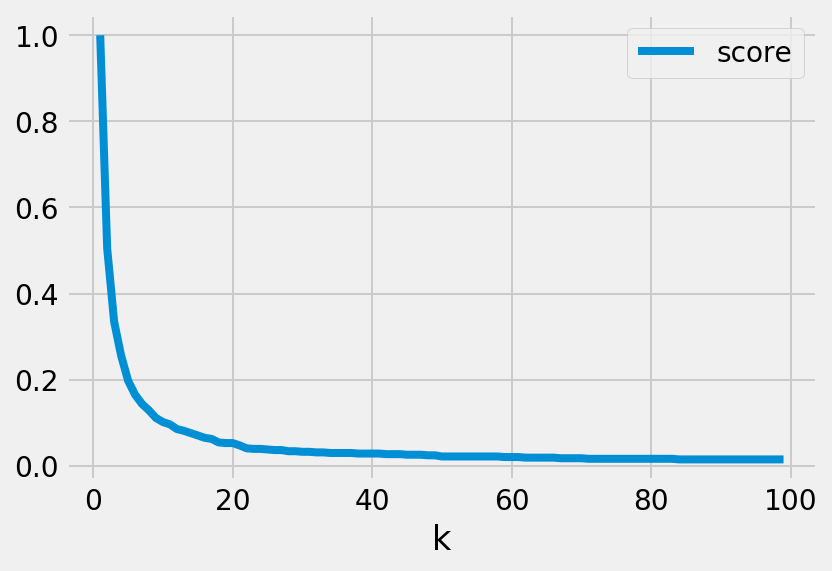

In [74]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [75]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [76]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
dferror = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
dferror.tail(10)

,testing error,training error
K,,
10,1.000000,0.921409
9,1.000000,0.907859
8,1.000000,0.901084
7,1.000000,0.887534
6,1.000000,0.875339
5,0.994595,0.853659
4,1.000000,0.799458
3,1.000000,0.743902
2,1.000000,0.624661


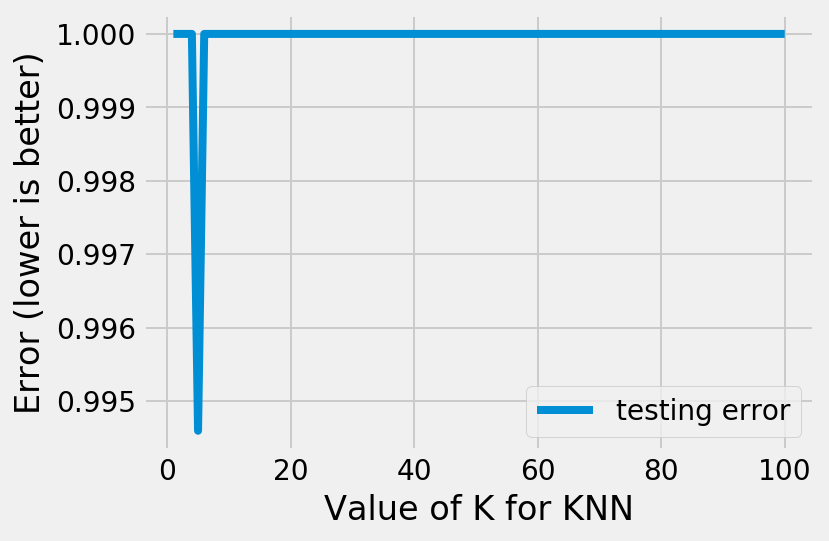

In [77]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
dferror.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)')
plt.tight_layout();

In [78]:
#THIS SEEMS REALLY OFF, lets try decision trees

In [79]:
from sklearn.tree import DecisionTreeRegressor

# Grow each tree deep.
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)
# List of values to try for max_depth:
max_depth_range = list(range(1, 21))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_depth.
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

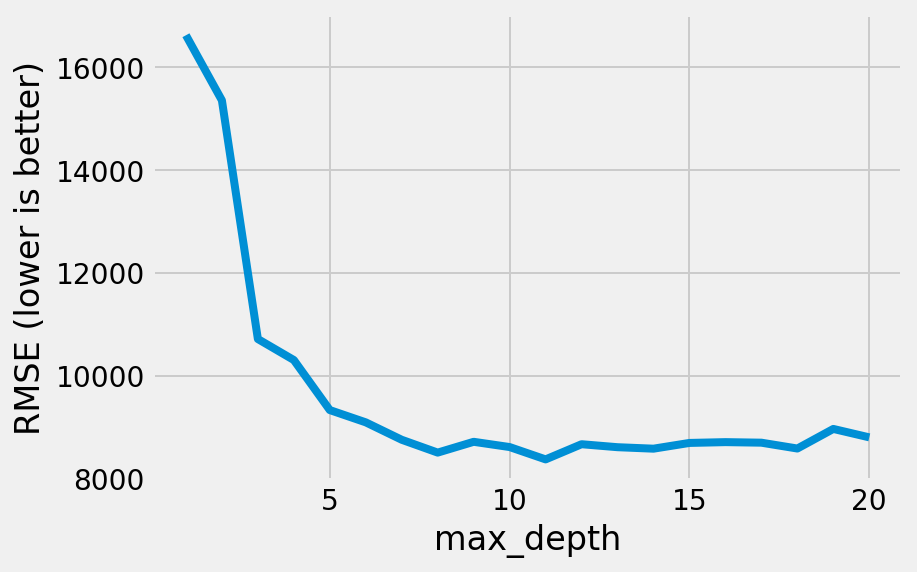

In [80]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [81]:
# Show the best RMSE and the corresponding max_depth.
sorted(zip(RMSE_scores, max_depth_range))[0]

(8378.8591227379839, 11)

In [82]:
# max_depth=2 was best, so fit a tree using that parameter.
treereg = DecisionTreeRegressor(max_depth=11, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [83]:

# Compute feature importances.
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values(by='importance')

,feature,importance
0,month,0.002298
2,year,0.006787
6,weekday_2,0.014344
5,weekday_1,0.015299
4,week,0.022792
7,weekday_3,0.026469
3,day_of_year,0.036093
8,weekday_4,0.046597
9,weekday_5,0.211583
10,weekday_6,0.258467


In [84]:
# Predicting Salary With a Random Forest
from sklearn.ensemble import RandomForestRegressor

# max_features=5 is best and n_estimators=150 is sufficiently large.
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X, y)

# Compute feature importances.
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance')

,feature,importance
6,weekday_2,0.014794
7,weekday_3,0.021085
5,weekday_1,0.021635
0,month,0.022610
8,weekday_4,0.041883
4,week,0.052356
3,day_of_year,0.066142
2,year,0.101913
9,weekday_5,0.169726
1,orders,0.234245


In [85]:
# Compute the out-of-bag R-squared score.
print((rfreg.oob_score_))

# Find the average RMSE.
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.868644486462


7789.3218079329617

In [86]:
###THIS IS THE BEST I HAVE SEEN YET! 

In [87]:
# Reducing X to its Most Important Features
# Check the shape of X.
X.shape

(738, 11)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 89)
# Fit the model on only the train data
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

# Set a threshold for which features to include.
from sklearn.feature_selection import SelectFromModel

print(SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_train).shape)
print(SelectFromModel(rfreg, threshold='median', prefit=True).transform(X_train).shape)



(553, 4)
(553, 6)


In [89]:
# Create a new feature matrix that only includes important features.

X_important =  SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_test)

# Check the RMSE for a random forest that only includes important features.
rfreg = RandomForestRegressor(n_estimators=150, max_features=3, random_state=1)

scores = cross_val_score(rfreg, X_important, y_test, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

9684.476441086219

In [90]:
######Optional: Tuning Individual Parameters
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()


# List of values to try for n_estimators:
estimator_range = list(range(60, 100, 1))

# List to store the average RMSE for each value of n_estimators:
RMSE_scores = []

# Use five-fold cross-validation with each value of n_estimators (Warning: Slow!).
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

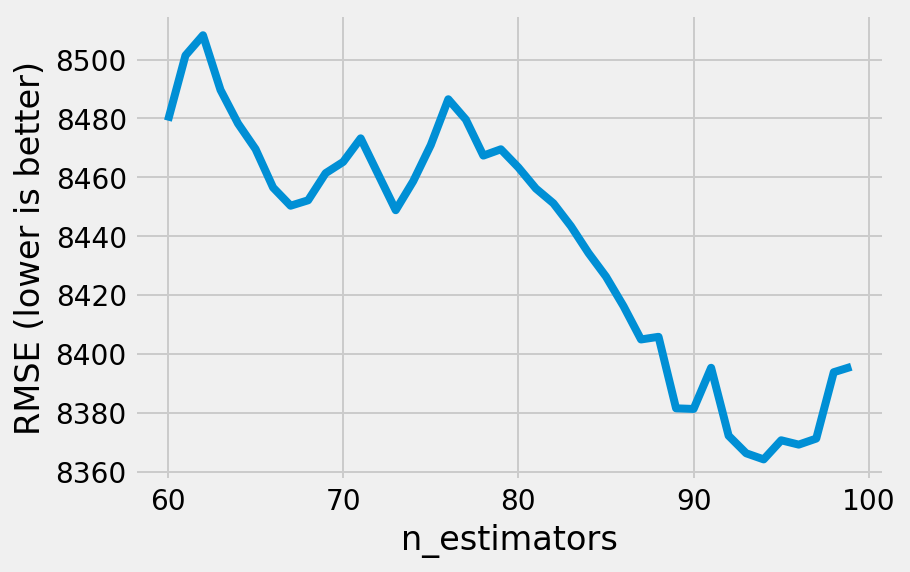

In [91]:
# Plot RMSE (y-axis) versus n_estimators (x-axis).
plt.plot(estimator_range, RMSE_scores);

plt.xlabel('n_estimators');
plt.ylabel('RMSE (lower is better)');

In [92]:
# Show the best RMSE and the corresponding max_depth.
sorted(zip(RMSE_scores, estimator_range))[0]

(8364.2112147061034, 94)

In [93]:
# Tuning max_features
# List of values to try for max_features:
feature_range = list(range(1, len(feature_cols)+1))

# List to store the average RMSE for each value of max_features:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_features (Warning: Super slow!).
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=94, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

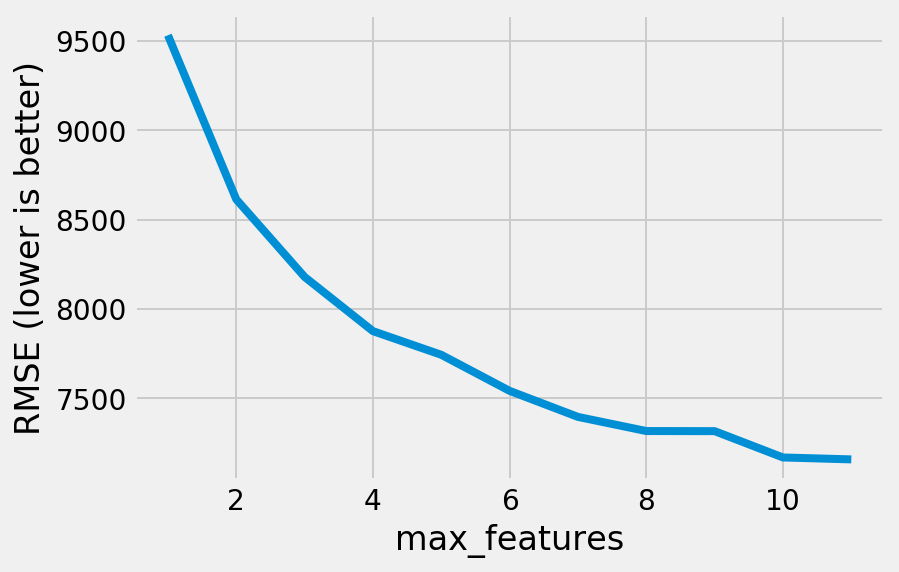

In [94]:
# Plot max_features (x-axis) versus RMSE (y-axis).

plt.plot(feature_range, RMSE_scores);

plt.xlabel('max_features');
plt.ylabel('RMSE (lower is better)');

In [ ]:
# Show the best RMSE and the corresponding max_features.
sorted(zip(RMSE_scores, feature_range))[0]

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': feature_range, 'n_estimators': estimator_range}
cv = GridSearchCV(rfreg, parameters)
cv.fit(X, y)
cv.best_estimator_

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 89)
# Fit the model on only the train data
rfreg = RandomForestRegressor(n_estimators=78, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

scores = cross_val_score(rfreg, X_important, y_test, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 89)
# Fit the model on only the train data
rfreg = RandomForestRegressor(n_estimators=94, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

scores = cross_val_score(rfreg, X_important, y_test, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

In [ ]:
#TRY TESTING OUT USING THIS WEEK TO PREDICT NEXT WEEK.  OR NEXT MONTH

In [103]:

#removing outliers caused by week 53
dfyearweek[dfyearweek['week'] == 53]
dfyearweek = dfyearweek.drop([52])

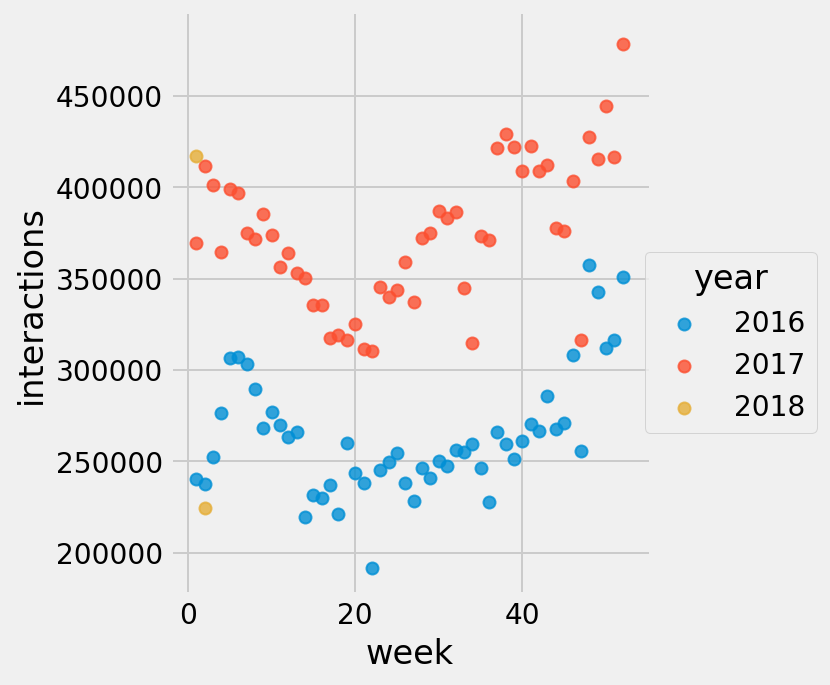

In [104]:
sns.lmplot(x='week', y='interactions', data=dfyearweek,
          fit_reg=False, hue='year');

In [107]:
dfyearweek.tail()

,week,year,calls,emails,chats,sms,orders,interactions
102,50,2017,105533.0,276124.0,20929.0,42088.0,185100.0,444674.0
103,51,2017,105065.0,257024.0,18599.0,35586.0,181468.0,416274.0
104,52,2017,122680.0,298180.0,18585.0,39050.0,235464.0,478495.0
105,1,2018,103025.0,249672.0,19432.0,45055.0,166412.0,417184.0
106,2,2018,56755.0,133821.0,11584.0,22492.0,70652.0,224652.0


In [115]:
dfyearweek['next_week_interactions'] = dfyearweek['interactions'].drop([0]).reset_index().drop(['index'],axis=1)
dfyearweek.head()

,week,year,calls,emails,chats,sms,orders,interactions,next_week_interactions
0,1,2016,0.0,226788.0,13474.0,0.0,100215.0,240262.0,237588.0
1,2,2016,3705.0,219524.0,14359.0,0.0,99338.0,237588.0,252286.0
2,3,2016,35242.0,202812.0,14232.0,0.0,90457.0,252286.0,276281.0
3,4,2016,35589.0,223544.0,17148.0,0.0,102816.0,276281.0,306558.0
4,5,2016,71026.0,218936.0,16596.0,0.0,97688.0,306558.0,306909.0


In [116]:
dfyearweek.tail()

,week,year,calls,emails,chats,sms,orders,interactions,next_week_interactions
102,50,2017,105533.0,276124.0,20929.0,42088.0,185100.0,444674.0,478495.0
103,51,2017,105065.0,257024.0,18599.0,35586.0,181468.0,416274.0,417184.0
104,52,2017,122680.0,298180.0,18585.0,39050.0,235464.0,478495.0,224652.0
105,1,2018,103025.0,249672.0,19432.0,45055.0,166412.0,417184.0,NaN
106,2,2018,56755.0,133821.0,11584.0,22492.0,70652.0,224652.0,NaN


In [118]:
dfyearweek = dfyearweek.drop([105,106])
dfyearweek.tail()

,week,year,calls,emails,chats,sms,orders,interactions,next_week_interactions
100,48,2017,94240.0,267192.0,20482.0,45821.0,158896.0,427735.0,444674.0
101,49,2017,95048.0,259592.0,20355.0,40308.0,165016.0,415303.0,416274.0
102,50,2017,105533.0,276124.0,20929.0,42088.0,185100.0,444674.0,478495.0
103,51,2017,105065.0,257024.0,18599.0,35586.0,181468.0,416274.0,417184.0
104,52,2017,122680.0,298180.0,18585.0,39050.0,235464.0,478495.0,224652.0


In [119]:
dummies_week = pd.get_dummies(dfyearweek.week, prefix='week')
dummies_week.drop(dummies_week.columns[0], axis=1, inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
dfyearweekdummies = pd.concat([dfyearweek, dummies_week], axis=1)

# Print 5 random rows.
dfyearweekdummies.head()

,week,year,calls,emails,chats,sms,orders,interactions,next_week_interactions,week_2,...,week_43,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52
0,1,2016,0.0,226788.0,13474.0,0.0,100215.0,240262.0,237588.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2016,3705.0,219524.0,14359.0,0.0,99338.0,237588.0,252286.0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,2016,35242.0,202812.0,14232.0,0.0,90457.0,252286.0,276281.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2016,35589.0,223544.0,17148.0,0.0,102816.0,276281.0,306558.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2016,71026.0,218936.0,16596.0,0.0,97688.0,306558.0,306909.0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
dummies_year = pd.get_dummies(dfyearweek.year, prefix='year')
dummies_year.drop(dummies_year.columns[0], axis=1, inplace=True)
dfyearweekdummies = pd.concat([dfyearweekdummies, dummies_year], axis=1)
dfyearweekdummies.head()

,week,year,calls,emails,chats,sms,orders,interactions,next_week_interactions,week_2,...,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,year_2017
0,1,2016,0.0,226788.0,13474.0,0.0,100215.0,240262.0,237588.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2016,3705.0,219524.0,14359.0,0.0,99338.0,237588.0,252286.0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,2016,35242.0,202812.0,14232.0,0.0,90457.0,252286.0,276281.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2016,35589.0,223544.0,17148.0,0.0,102816.0,276281.0,306558.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2016,71026.0,218936.0,16596.0,0.0,97688.0,306558.0,306909.0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
# Create feature matrix (X).
feature_cols = ['year', 'orders', 'calls','emails','chats','sms', 'interactions','week', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6','week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12', 'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19', 'week_20', 'week_21', 'week_22', 'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30', 'week_31', 'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37', 'week_38', 'week_39', 'week_40', 'week_41', 'week_42', 'week_43', 'week_44', 'week_45', 'week_46', 'week_47','week_48','week_49','week_50','week_51','week_52']
X = dfyearweekdummies[feature_cols]

# Create response vector (y).
y = dfyearweekdummies.next_week_interactions

In [122]:
from sklearn.ensemble import RandomForestRegressor

# max_features=5 is best and n_estimators=150 is sufficiently large.
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X, y)

# Compute feature importances.
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance')

,feature,importance
14,week_8,0.000355
28,week_22,0.000373
18,week_12,0.000392
35,week_29,0.000474
17,week_11,0.000528
24,week_18,0.000588
15,week_9,0.000624
8,week_2,0.000631
13,week_7,0.000728
32,week_26,0.000737


In [123]:
# Compute the out-of-bag R-squared score.
print((rfreg.oob_score_))

# Find the average RMSE.
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.723317834338


31382.776512933749

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 89)
# Fit the model on only the train data
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

# Set a threshold for which features to include.
from sklearn.feature_selection import SelectFromModel

print(SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_train).shape)
print(SelectFromModel(rfreg, threshold='median', prefit=True).transform(X_train).shape)

(78, 8)
(78, 30)


In [128]:
# Create a new feature matrix that only includes important features.

X_important =  SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_test)

# Check the RMSE for a random forest that only includes important features.
rfreg = RandomForestRegressor(n_estimators=150, max_features=3, random_state=1)

scores = cross_val_score(rfreg, X_important, y_test, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

26720.968428305699

In [132]:
######Optional: Tuning Individual Parameters
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()


# List of values to try for n_estimators:
estimator_range = list(range(70, 125, 1))

# List to store the average RMSE for each value of n_estimators:
RMSE_scores = []

# Use five-fold cross-validation with each value of n_estimators (Warning: Slow!).
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

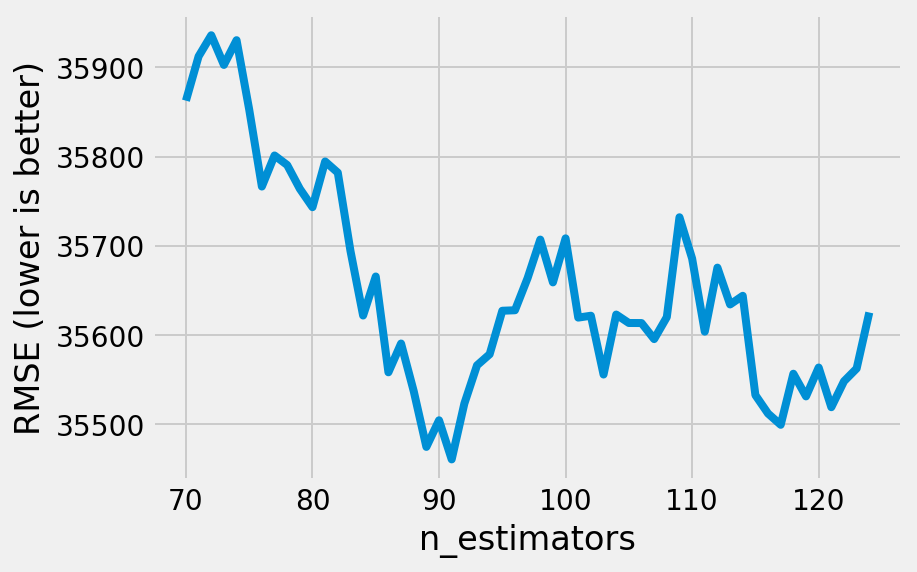

In [133]:
# Plot RMSE (y-axis) versus n_estimators (x-axis).
plt.plot(estimator_range, RMSE_scores);

plt.xlabel('n_estimators');
plt.ylabel('RMSE (lower is better)');

In [134]:
# Show the best RMSE and the corresponding max_depth.
sorted(zip(RMSE_scores, estimator_range))[0]

(35460.916937965994, 91)

In [135]:
# Tuning max_features
# List of values to try for max_features:
feature_range = list(range(1, len(feature_cols)+1))

# List to store the average RMSE for each value of max_features:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_features (Warning: Super slow!).
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=91, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

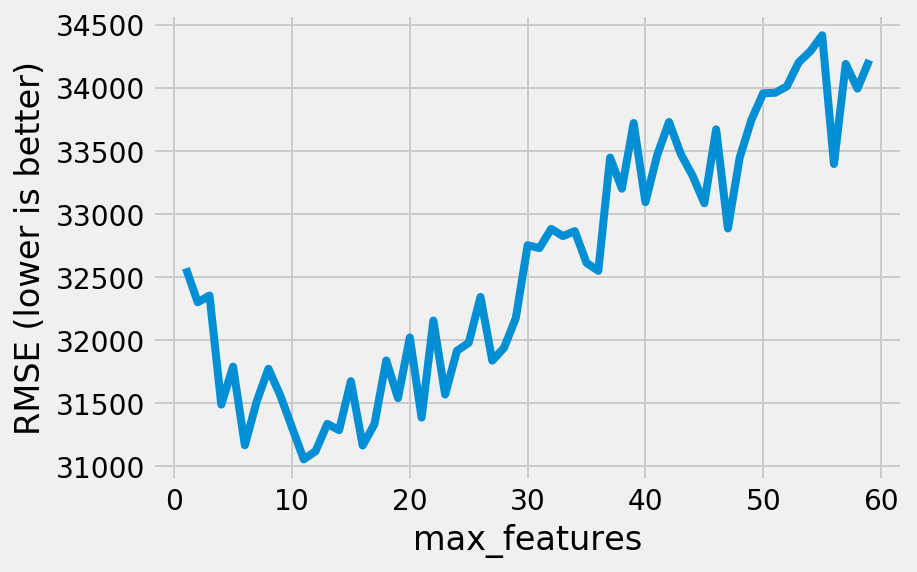

In [136]:
# Plot max_features (x-axis) versus RMSE (y-axis).

plt.plot(feature_range, RMSE_scores);

plt.xlabel('max_features');
plt.ylabel('RMSE (lower is better)');

In [137]:
# Show the best RMSE and the corresponding max_features.
sorted(zip(RMSE_scores, feature_range))[0]

(31054.919308661843, 11)

In [142]:
# Create feature matrix (X).
feature_cols = ['year', 'orders', 'calls','emails','chats','sms', 'interactions','week', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6','week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12', 'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19', 'week_20', 'week_21', 'week_22', 'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30', 'week_31', 'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37', 'week_38', 'week_39', 'week_40', 'week_41', 'week_42', 'week_43', 'week_44', 'week_45', 'week_46', 'week_47','week_48','week_49','week_50','week_51','week_52']
X = dfyearweekdummies[feature_cols]

# Create response vector (y).
y = dfyearweekdummies.next_week_interactions
###

from sklearn.ensemble import RandomForestRegressor

# # max_features=5 is best and n_estimators=150 is sufficiently large.
rfreg = RandomForestRegressor(n_estimators=91, max_features=11, oob_score=True, random_state=1)
rfreg.fit(X, y)

# Compute feature importances.
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance')

#####
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 89)
# Fit the model on only the train data
rfreg = RandomForestRegressor(n_estimators=91, max_features=11, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

# # Set a threshold for which features to include.
# from sklearn.feature_selection import SelectFromModel

# print(SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_train).shape)
# print(SelectFromModel(rfreg, threshold='median', prefit=True).transform(X_train).shape)

######

# # Create a new feature matrix that only includes important features.

# X_important =  SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_test)

# Check the RMSE for a random forest that only includes important features.
# rfreg = RandomForestRegressor(n_estimators=150, max_features=3, random_state=1)

scores = cross_val_score(rfreg, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

26522.242034155606

In [141]:
# Create feature matrix (X).
feature_cols = ['year', 'orders', 'calls','emails','chats','sms', 'interactions','week', 'week_47','week_50','week_52']
X = dfyearweekdummies[feature_cols]

# Create response vector (y).
y = dfyearweekdummies.next_week_interactions
###

from sklearn.ensemble import RandomForestRegressor

# # # max_features=5 is best and n_estimators=150 is sufficiently large.
# rfreg = RandomForestRegressor(n_estimators=91, max_features=11, oob_score=True, random_state=1)
# rfreg.fit(X, y)

# # # Compute feature importances.
# # pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance')

#####
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 89)
# Fit the model on only the train data
rfreg = RandomForestRegressor(n_estimators=91, max_features=11, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)


scores = cross_val_score(rfreg, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

26876.024840238177

In [144]:
# Create feature matrix (X).
feature_cols = ['year', 'orders', 'calls','emails','chats','sms', 'interactions','week', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6','week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12', 'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19', 'week_20', 'week_21', 'week_22', 'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30', 'week_31', 'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37', 'week_38', 'week_39', 'week_40', 'week_41', 'week_42', 'week_43', 'week_44', 'week_45', 'week_46', 'week_47','week_48','week_49','week_50','week_51','week_52']
X = dfyearweekdummies[feature_cols]

# Create response vector (y).
y = dfyearweekdummies.next_week_interactions
###

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 89)
# Fit the model on only the train data
rfreg = RandomForestRegressor(n_estimators=91, max_features=11, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

scores = cross_val_score(rfreg, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

26522.242034155606

In [152]:
from sklearn.metrics import accuracy_score
predicted = rfreg.predict(X_test)
# accuracy = accuracy_score(y_test, predicted)
accuracy = accuracy_score(y_test, predicted.round(), normalize=False)


# Compute the out-of-bag R-squared score.
print((rfreg.oob_score_))

# #compute the mean accuracy score
print accuracy

# Find the average RMSE.
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.718601059
0


31054.919308661843

In [159]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rfreg.predict(X_train)
predicted_test = rfreg.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print('Out-of-bag R-2 score estimate:') 
rfreg.oob_score_


Out-of-bag R-2 score estimate:


0.71860105900039928

In [160]:
print('Test data R-2 score:') 
test_score


Test data R-2 score:


0.84509102580223594

In [164]:
print('Test data Spearman correlation:') 
spearman[0]

Test data Spearman correlation:


0.94051282051282048

In [163]:
print('Test data Pearson correlation:') 
pearson[0]

Test data Pearson correlation:


0.92072581662943953

In [ ]:
sns.lmplot(x='y_test', y='y', data=rfreg,
          fit_reg=False);